In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

In [35]:
#load csv into dataframe
df = pd.read_csv('emails.csv')

df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [36]:
#clean and process data
df.drop_duplicates(inplace=True)

df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [37]:
#seperate features and target variable
X = df['text'] #features (email content)
y = df['spam'] #target variable (1 for spam, 0 for not spam)

In [38]:
#splits dataset into traning and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#vectorize data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [39]:
#initialize decision tree and train model
model = DecisionTreeClassifier()

model.fit(X_train_vectorized, y_train)


DecisionTreeClassifier()

In [40]:
#make predictions and calculate accuracy
y_pred = model.predict(X_test_vectorized)

accuracy_score(y_test, y_pred)

0.9514335868929198

In [41]:
#locate most important words in model
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = vectorizer.get_feature_names_out()
print("The 10 most used words in the dataset are:")
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

The 10 most used words in the dataset are:
vince: 0.28936898738809347
enron: 0.1884024473811396
2000: 0.06386386300587261
attached: 0.049190281102400334
thanks: 0.04622644552758809
your: 0.024513593399327332
the: 0.020215841333469615
you: 0.016838971491382106
conference: 0.013460647441804564
research: 0.012955622321188798


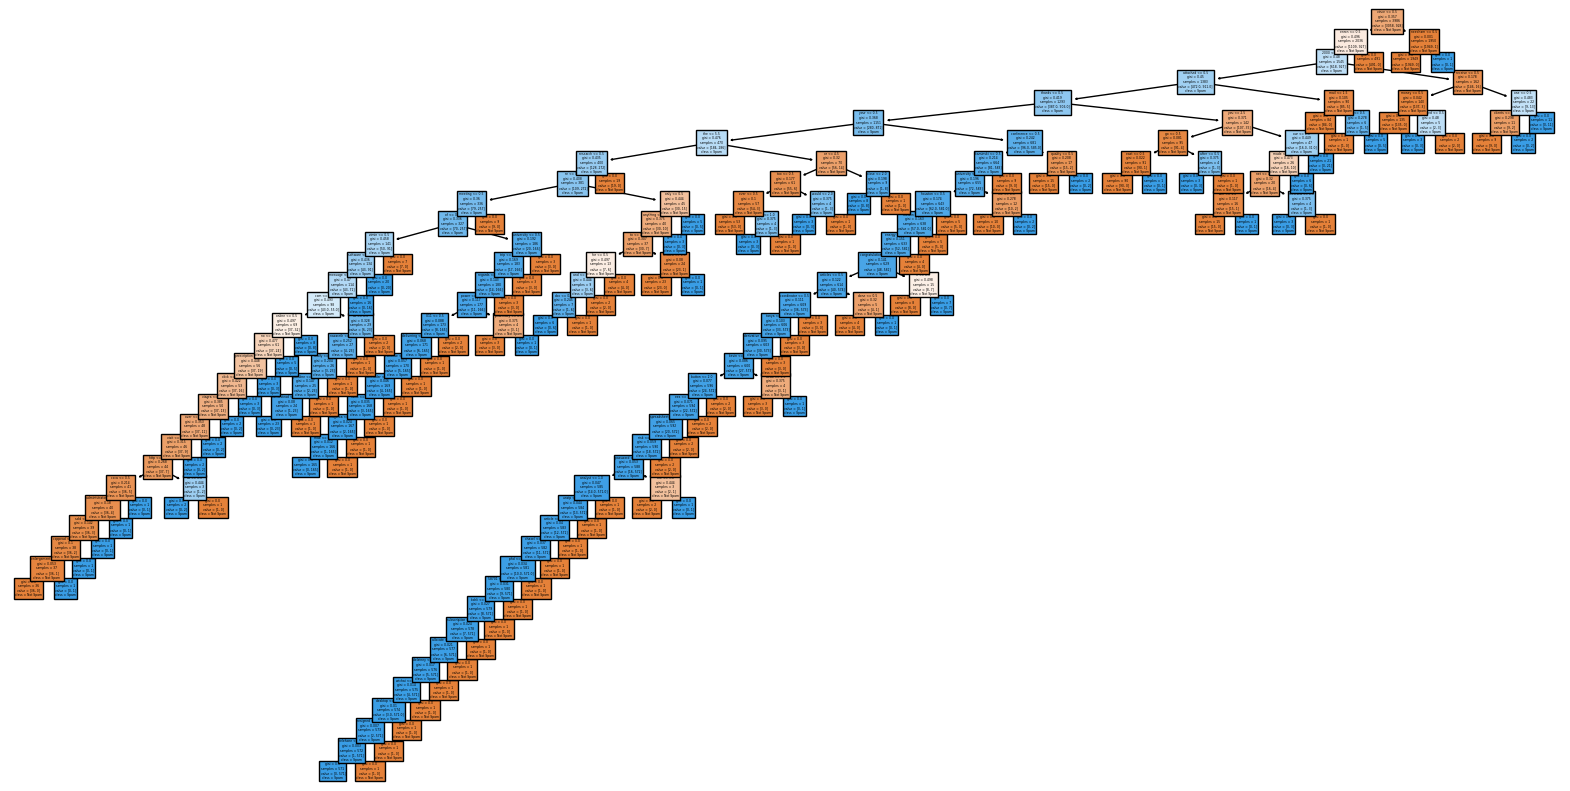

In [42]:
#visualization of decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=vectorizer.get_feature_names_out(), class_names=["Not Spam", "Spam"], filled=True)
plt.show()

In [43]:
# convert text to feature vectors
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

model = LogisticRegression()

model.fit(X_train_features, y_train)

prediction_on_test_data = model.predict(X_test_features)

In [45]:
#attempt to make a prediction based on an input
input_mail = ["Click the link for $1,000,000! please do it, I am a foreign prince needing donation."]

input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('spam mail')

else:
  print('not spam')

[1]
spam mail
